# CSCI-B 505 Applied Algorithms - Assignment 3

### Name : Akhila Sakiramolla
### UID : 2000886005
### Assignment partner : Shyam Kanuru 

## Question 1 :  Sum of reciprocals

1) The given program consists of functions to calculate sum and product of an input list. To calculate sum of reciprocals of the input list, we first need to calculate inverse of all numbers in the list and then add these numbers.

2) For this, I have created a function rs1, which takes an input list and creates another list with all elements inverted. Now we can use the sum function to add these numbers.

In [2]:
def f1(*x, **y):
    def s1(x):
        s = 0
        if x:
            for i in x:
                s += i
        return s
    
    def p1(x):
        s = 1
        if x:
            for i in x:
                s *= i
        return s
    
    def rs1(x):
        s = 0
        if x:
            r = [(lambda a: 1/a)(a) for a in x] # to map every element to its inverse
            s = round(s1(r),2)                  # using above sum function to add elements
        return s
    
    if y["action"] == "sum":
        return f"The sum is: {s1(*x)}"
    elif y["action"] == "prod":
        return f"The product is: {p1(*x)}"
    elif y["action"] == "reciprocal sum":
        return f"The reciprocal sum is: {rs1(*x)}"
    else:
        return f"bad argument: {y}"

In [3]:
if __name__ == '__main__':
    xlst = [1,2,3,4,5,6]
    
    print(f1(xlst, action = "sum"))
    print(f1(xlst, action = "prod"))
    print(f1(xlst, action = "reciprocal sum"))

The sum is: 21
The product is: 720
The reciprocal sum is: 2.45


## Question 2 : Execute program from the console using a list of numbers and the operation

We read the input from the console to execute the sum, product and reciprocal sum and parse it using a module called 'argparse'.

In [ ]:
# This code is saved as another file which i'm using to run the below codes

import argparse

def f1(*x, **y):
    def s1(x):
        s = 0
        if x:
            for i in x:
                s += i
        return s
    
    def p1(x):
        s = 1
        if x:
            for i in x:
                s *= i
        return s
    
    def rs1(x):
        s = 0
        if x:
            r = [(lambda a: 1/a)(a) for a in x] # used the lambda function to inverse every element
            s = round(s1(r),2)                  # using the above sum function to add elements
        return s
    
    if y["action"] == "sum":
        return f"The sum is: {s1(*x)}"
    elif y["action"] == "prod":
        return f"The product is: {p1(*x)}"
    elif y["action"] == "rec":
        return f"The reciprocal sum is: {rs1(*x)}"
    else:
        return f"bad argument: {y}"


if __name__ == '__main__':

    parser = argparse.ArgumentParser()
    parser.add_argument('-lst', type = int, nargs='+', default = ['1'], help="List of numbers")
    parser.add_argument('-op', default = 'sum', help = "sum, prod, rec")
    args = parser.parse_args()
    print(args.lst)
    print(args.op)
    output = f1(args.lst, action = args.op)
    print(output)

In [1]:
! python A3_Q2.py -lst 1 2 3 4 5 -op sum

[1, 2, 3, 4, 5]
sum
The sum is: 15


In [2]:
! python A3_Q2.py -lst 1 2 3 4 5 -op prod

[1, 2, 3, 4, 5]
prod
The product is: 120


In [3]:
! python A3_Q2.py -lst 1 2 3 4 5 -op rec

[1, 2, 3, 4, 5]
rec
The reciprocal sum is: 2.28


## Question 3 : Complex number multiplication

1) The given function consists of function to add complex numbers. To calculate product of complex numbers, I have created a function to multiply and add the real and imaginary parts of the complex numbers.

2) For example: 
Consider two complex numbers a and b, below is their multiplication

    a = (re1 + im1)
    b = (re2 + im2)
    for a*b = (re1 + im1) * (re2 + im2)
            = (re1*re2) + (re1*im2) + (im1*re2) + (im1*im2)
        re(a*b) = (re1*re2) + (im1*im2)
        im(a*b) = (re1*im2) + (im1*re2)

In [1]:
class complex_:
    def __init__(self, re=0, im=0):
        self.re = re
        self.im = im

    def get_re(self):
        return self.re
    
    def get_im(self):
        return self.im

    def __str__(self):
        g = lambda x:"+" if x >= 0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)"
     
    def cadd(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    def cmul(self, other):
        new_re = (self.get_re() * other.get_re()) - (self.get_im() * other.get_im())
        new_im = (self.get_re() * other.get_im()) + (self.get_im() * other.get_re())
        return complex_(new_re, new_im)
    
    def __mul__(self, other):
        new_re = (self.get_re() * other.get_re()) - (self.get_im() * other.get_im())
        new_im = (self.get_re() * other.get_im()) + (self.get_im() * other.get_re())
        return complex_(new_re, new_im)
    
if __name__ =='__main__':
    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    print(w)
    print(x)
    print(y)
    print(z)
    
    # Computing the complex number multiplication in different ways to verify the result
    print(w.cmul(x).cmul(y).cmul(z))
    print((1-3j) * (-1+3j) * (1+3j) * (-1-3j))
    print(w * x * y * z)

(1-3i)
(-1+3i)
(1+3i)
(-1-3i)
(100+0i)
(100+0j)
(100+0i)


## Question 4 - Visualisation of running times for 3 functions

To calculate the execution time for each function, I have used an in-built python library called "timeit". I stored the time before and after execution of each function and the difference of these times gives me the the running time of the functions

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [15]:
def average1(S):
    #S:sequence
    n = len(S)
    my_average = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
            my_average[j] = total / (j+1)
    
    return my_average

def average2(S):
    #S:sequence
    n = len(S)
    my_average= [0] * n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    #S:sequence
    n = len(S)
    my_average = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

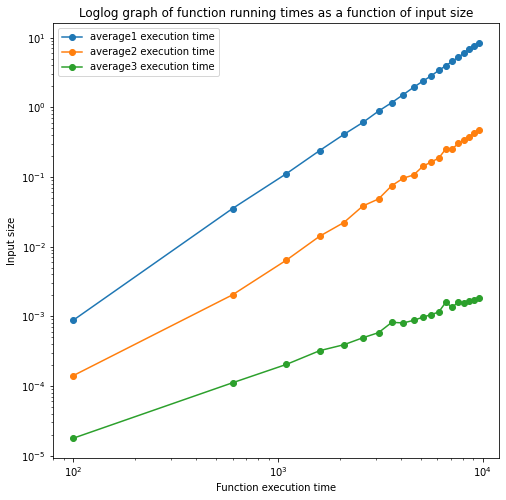

In [16]:
# Initialising 3 lists to store run times for 3 algorithms for every iteration
avg1_time = []
avg2_time = []
avg3_time = []

# Creating a list starting from size 100 to 10,000, to run iterations for different sizes of inputs
input_list = list(range(100,10000,500))

for i in input_list:  
    S = list(range(i))        # Creating a list for the given input size
    
    start1 = timeit.default_timer()  # Storing time at the start of the function execution
    average1(S)               # Function execution for the given input
    end1 = timeit.default_timer()    # Storing time at the end of the function execution
    a = end1 - start1         # Calculating the time taken for executing the function
    
    start2 = timeit.default_timer()  # Storing time at the start of the function execution
    average2(S)               # Function execution for the given input
    end2 = timeit.default_timer()    # Storing time at the end of the function execution
    b = end2 - start2         # Calculating the time taken for executing the function
    
    start3 = timeit.default_timer()  # Storing time at the start of the function execution
    average3(S)               # Function execution for the given input
    end3 = timeit.default_timer()    # Storing time at the end of the function execution
    c = end3 - start3         # Calculating the time taken for executing the function
    
    avg1_time.append(a)   # Appending the execution time in a list for each iteration of average1 function
    avg2_time.append(b)   # Appending the execution time in a list for each iteration of average2 function
    avg3_time.append(c)   # Appending the execution time in a list for each iteration of average3 function
    
#Creating a log-log plot for the execution of 3 functions as a function of input sizes
plt.figure(figsize=(8, 8))
plt.xlabel('Function execution time') 
plt.ylabel('Input size') 
plt.title("Loglog graph of function running times as a function of input size")
plt.loglog(input_list, avg1_time, label = "average1 execution time", marker ="o")
plt.loglog(input_list, avg2_time, label = "average2 execution time", marker ="o")
plt.loglog(input_list, avg3_time, label = "average3 execution time", marker ="o")
plt.legend()
plt.show()

## Question 5 : Largest value of input size such that given algorithm runs in less than 45 seconds

I have tried and tested different range of values to find the largest input that runs in less than 45 seconds. I have run the codes below for those final ranges of values 

In [27]:
import random
import time

In [17]:
def algorithm1(S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

def algorithm2(S):
    #S:sequence
    S = sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

def algorithm3(S, start, stop):
    #slice S[start:stop], S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

In [21]:
# Function to calculate the execution time for all the 3 algorithms
def run_time(algo,S):
  if algo in [algorithm1,algorithm2]:
    start = time.time()
    algo(S)
    return time.time()-start
  else:
    start = time.time()
    algorithm3(S, start=0, stop=len(S))
    return time.time()-start

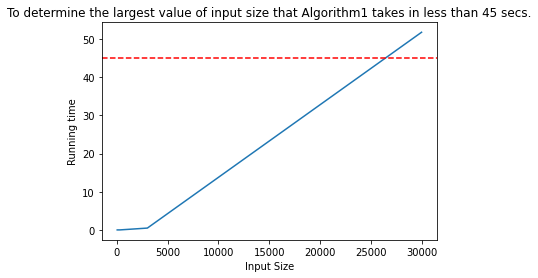

In [28]:
# Initialising lists to store the runtime and input size for every iteration
li1 = []
size1 = []
for i in range(1,5):
  randomlist = random.sample(range(1,10**5),3*10**i)
  size1.append(3*10**i)
  li1.append(run_time(algorithm1,randomlist))
  
plt.plot(size1,li1)
plt.xlabel('Input Size')
plt.ylabel('Running time')
plt.title('To determine the largest value of input size that Algorithm1 takes in less than 45 secs.')
plt.axhline(y = 45 , color = 'r', linestyle = '--')
plt.show()

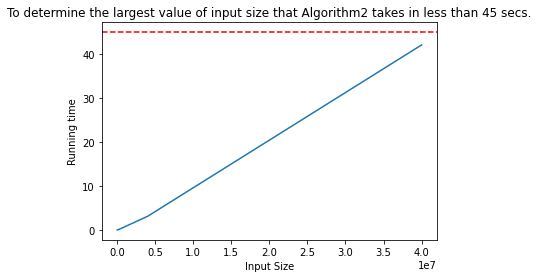

In [29]:
# Initialising lists to store the runtime and input size for every iteration
li2 = []
size2 =[]
for i in range(1,8):
  randomlist = random.sample(range(1,10**9),4*10**i)
  size2.append(4*10**i)
  li2.append(run_time(algorithm2,randomlist))

plt.plot(size2,li2)
plt.xlabel('Input Size')
plt.ylabel('Running time')
plt.title('To determine the largest value of input size that Algorithm2 takes in less than 45 secs.')
plt.axhline(y = 45 , color = 'r', linestyle = '--')
plt.show()

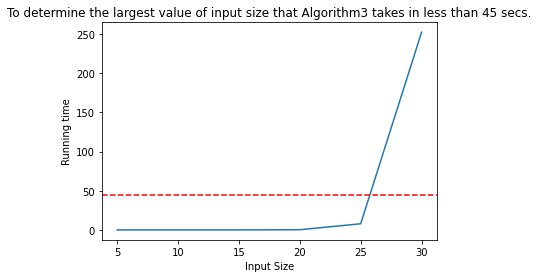

In [30]:
# Initialising lists to store the runtime and input size for every iteration
size3 = []
li3 = []
for i in range(1,7):
  randomlist = random.sample(range(1,100),i*5)
  size3.append(i*5)
  li3.append(run_time(algorithm3,randomlist))

plt.plot(size3,li3)
plt.xlabel('Input Size')
plt.ylabel('Running time')
plt.title('To determine the largest value of input size that Algorithm3 takes in less than 45 secs.')
plt.axhline(y = 45 , color = 'r', linestyle = '--')
plt.show()